In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
# sb.set() # set the default Seaborn style for graphics

In [2]:
houseData = pd.read_csv('train (1).csv')

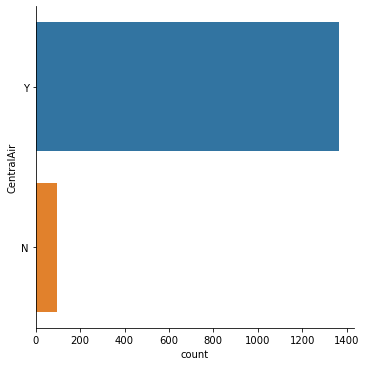

In [3]:
sb.catplot(y = "CentralAir", data = houseData, kind = "count")

In [4]:
houseData["CentralAir"].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [5]:
sp = pd.DataFrame(houseData["SalePrice"])
ca = pd.DataFrame(houseData["CentralAir"])

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

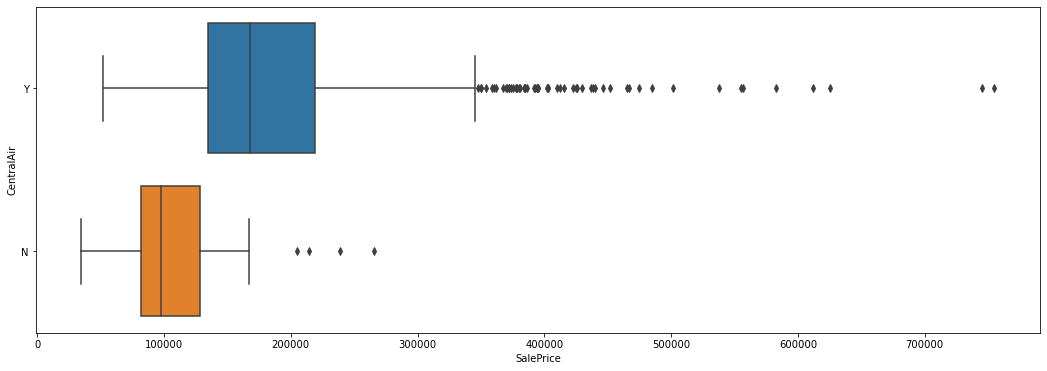

In [6]:
join = pd.concat([sp,ca],axis = 1).reindex(sp.index)

f = plt.figure(figsize=(18,6))
sb.boxplot( x = "SalePrice",y = "CentralAir", data = join, orient = "h")


C:\Users\graez\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

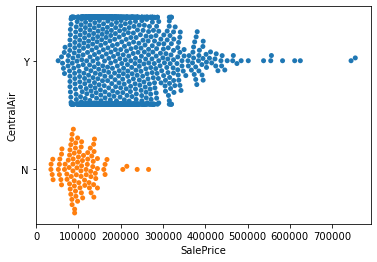

In [7]:
sb.swarmplot(x = "SalePrice",y = "CentralAir", data = join, orient = "h")

In [8]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

In [9]:
sp_train = pd.DataFrame(sp[:1100])
ca_train = pd.DataFrame(ca[:1100])

sp_test = pd.DataFrame(sp[-360:])
ca_test = pd.DataFrame(ca[-360:])

# Check the sample sizes
print("Train Set :", ca_train.shape, sp_train.shape)
print("Test Set  :", ca_test.shape, sp_test.shape)


Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


In [10]:
dectree.fit(sp_train, ca_train)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'SalePrice <= 107450.0\ngini = 0.125\nsamples = 1100\nvalue = [74, 1026]\nclass = Central Air-con'),
 Text(167.4, 326.16, 'SalePrice <= 79250.0\ngini = 0.474\nsamples = 119\nvalue = [46, 73]\nclass = Central Air-con'),
 Text(83.7, 108.72000000000003, 'gini = 0.444\nsamples = 24\nvalue = [16, 8]\nclass = No Central Air-con'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.432\nsamples = 95\nvalue = [30, 65]\nclass = Central Air-con'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 145125.0\ngini = 0.055\nsamples = 981\nvalue = [28, 953]\nclass = Central Air-con'),
 Text(418.5, 108.72000000000003, 'gini = 0.128\nsamples = 305\nvalue = [21, 284]\nclass = Central Air-con'),
 Text(585.9, 108.72000000000003, 'gini = 0.02\nsamples = 676\nvalue = [7, 669]\nclass = Central Air-con')]

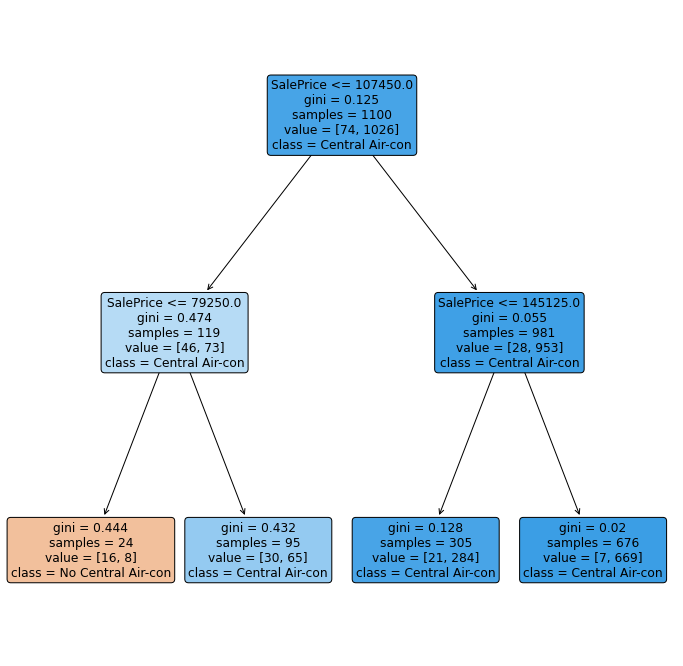

In [11]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No Central Air-con","Central Air-con"])

Classification Accuracy 	: 0.94


Text(0.5, 1.0, 'Train')

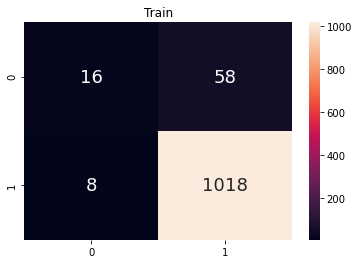

In [12]:
ca_train_pred = dectree.predict(sp_train)

print("Classification Accuracy \t:", dectree.score(sp_train, ca_train))


# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ca_train, ca_train_pred)
sb.heatmap(cm, 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.title("Train")



In [13]:

print("True Positive Rate \t:",cm[1][1]/(cm[1][1]+cm[1][0]))

print("True Negative Rate \t:",cm[0][0]/(cm[0][0]+cm[0][1]))

print("False Positive Rate \t:", cm[0][1]/(cm[0][1]+cm[0][0]))

print("False Negative Rate \t:", cm[1][0]/(cm[1][0]+cm[1][1]))

True Positive Rate 	: 0.9922027290448343
True Negative Rate 	: 0.21621621621621623
False Positive Rate 	: 0.7837837837837838
False Negative Rate 	: 0.007797270955165692


Classification Accuracy 	: 0.9472222222222222


Text(0.5, 1.0, 'Test')

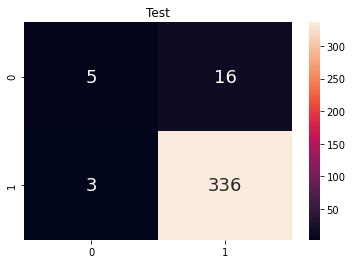

In [14]:
ca_test_pred = dectree.predict(sp_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(sp_test, ca_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(ca_test, ca_test_pred)
sb.heatmap(cm_test, 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.title("Test")

In [15]:

print("True Positive Rate \t:",cm_test[1][1]/(cm_test[1][1]+cm_test[1][0]))

print("True Negative Rate \t:",cm_test[0][0]/(cm_test[0][0]+cm_test[0][1]))

print("False Positive Rate \t:", cm_test[0][1]/(cm_test[0][1]+cm_test[0][0]))

print("False Negative Rate \t:", cm_test[1][0]/(cm_test[1][0]+cm_test[1][1]))

True Positive Rate 	: 0.9911504424778761
True Negative Rate 	: 0.23809523809523808
False Positive Rate 	: 0.7619047619047619
False Negative Rate 	: 0.008849557522123894


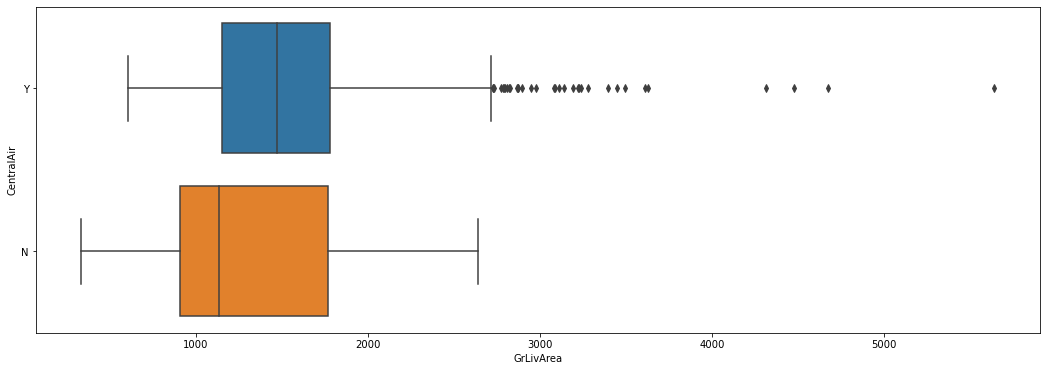

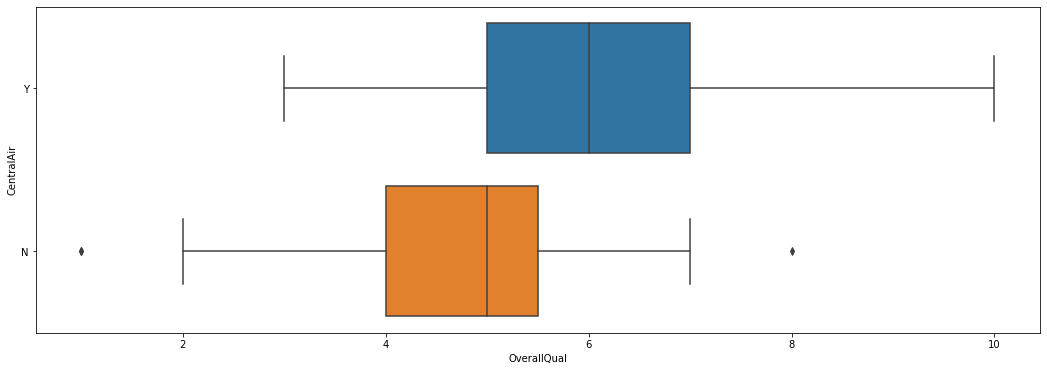

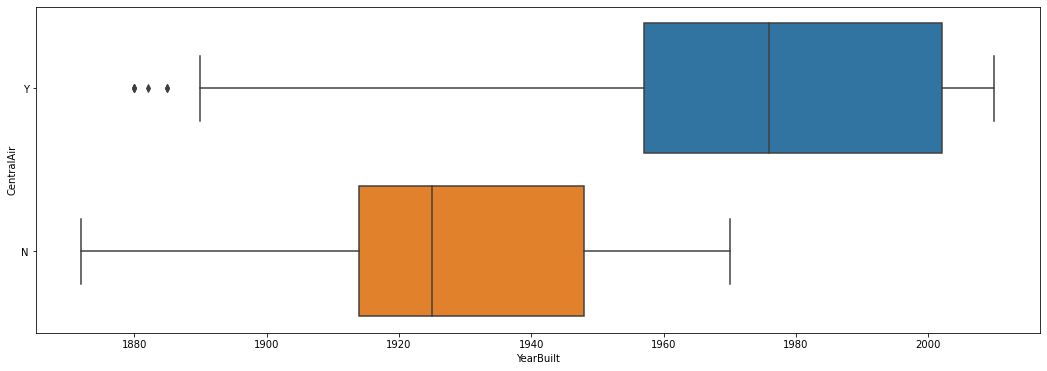

In [16]:
ls = ['GrLivArea', 'OverallQual', 'YearBuilt']

# Plot bivariate relationship

for var in ls:
    x = pd.DataFrame(houseData[var])
    ca = pd.DataFrame(houseData["CentralAir"])
    
    join = pd.concat([x,ca],axis = 1).reindex(x.index)

    f = plt.figure(figsize=(18,6))
    sb.boxplot( x = var,y = "CentralAir", data = join, orient = "h")

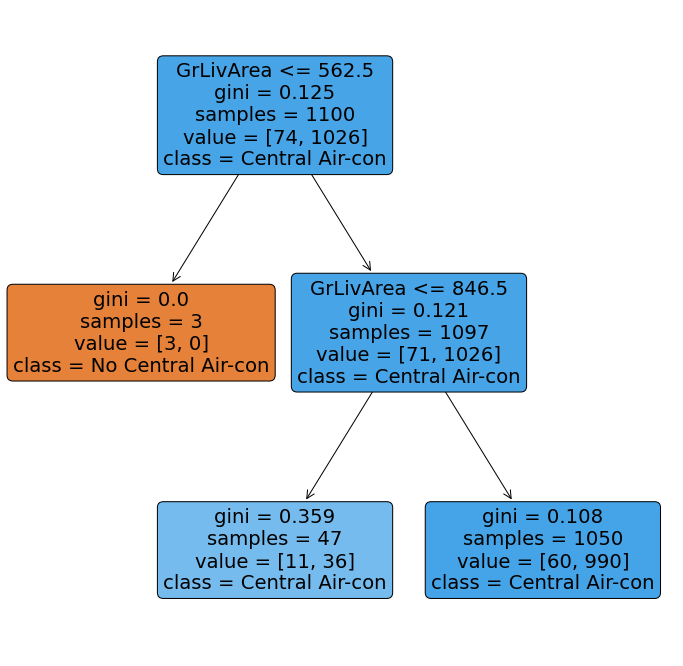

Classification Accuracy for train	: 0.9354545454545454


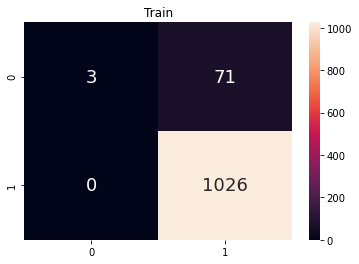

True Positive Rate 	: 1.0
True Negative Rate 	: 0.04054054054054054
False Positive Rate 	: 0.9594594594594594
False Negative Rate 	: 0.0

Classification Accuracy for test 	: 0.9444444444444444


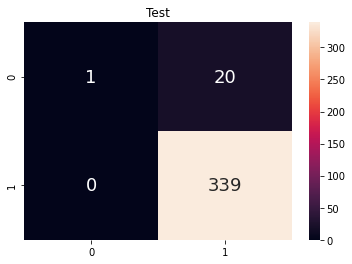

True Positive Rate 	: 1.0
True Negative Rate 	: 0.047619047619047616
False Positive Rate 	: 0.9523809523809523
False Negative Rate 	: 0.0


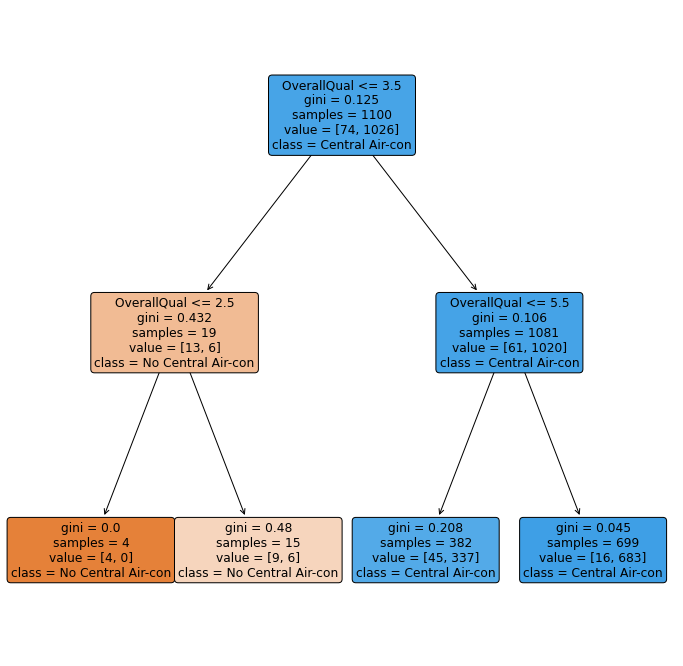

Classification Accuracy for train	: 0.9390909090909091


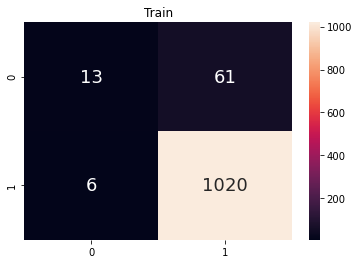

True Positive Rate 	: 0.9941520467836257
True Negative Rate 	: 0.17567567567567569
False Positive Rate 	: 0.8243243243243243
False Negative Rate 	: 0.005847953216374269

Classification Accuracy for test 	: 0.9416666666666667


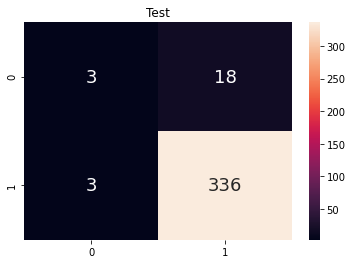

True Positive Rate 	: 0.9911504424778761
True Negative Rate 	: 0.14285714285714285
False Positive Rate 	: 0.8571428571428571
False Negative Rate 	: 0.008849557522123894


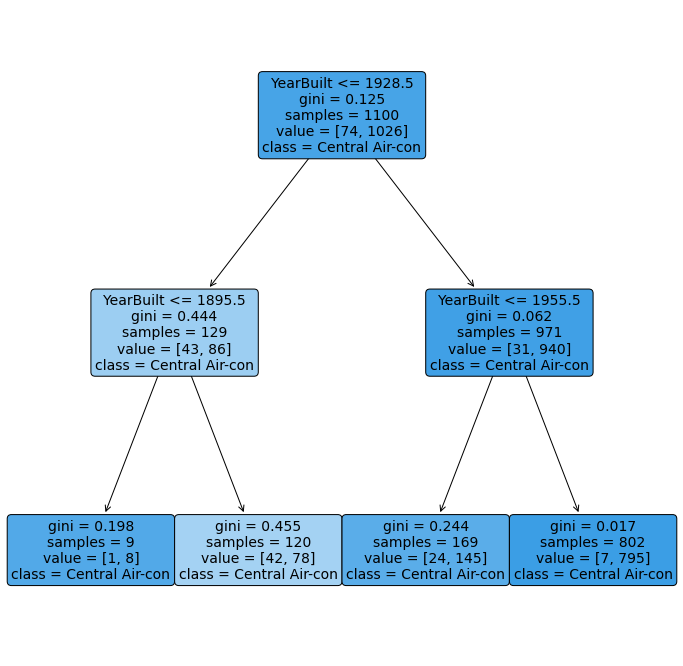

Classification Accuracy for train	: 0.9327272727272727


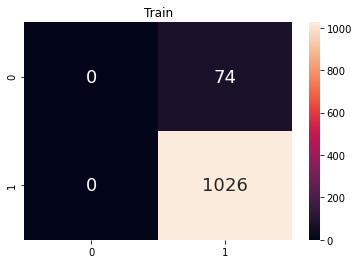

True Positive Rate 	: 1.0
True Negative Rate 	: 0.0
False Positive Rate 	: 1.0
False Negative Rate 	: 0.0

Classification Accuracy for test 	: 0.9416666666666667


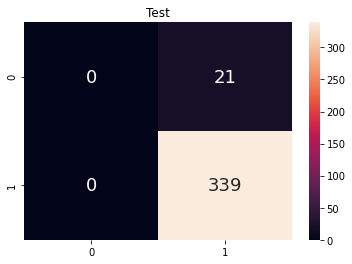

True Positive Rate 	: 1.0
True Negative Rate 	: 0.0
False Positive Rate 	: 1.0
False Negative Rate 	: 0.0


In [17]:
for var in ls:
    
    x = pd.DataFrame(houseData[var])
    ca = pd.DataFrame(houseData["CentralAir"])
    
    x_train = pd.DataFrame(x[:1100])
    ca_train = pd.DataFrame(ca[:1100])

    x_test = pd.DataFrame(x[-360:])
    ca_test = pd.DataFrame(ca[-360:])

#     # Check the sample sizes
#     print("Train Set for {} :".format(var), ca_train.shape, x_train.shape)
#     print("Test Set for {} :".format(var), ca_test.shape, x_test.shape)
    
    dectree.fit(x_train, ca_train)
    
    
    f = plt.figure(figsize=(12,12))
    plot_tree(dectree, filled=True, rounded=True, 
              feature_names=[var], 
              class_names=["No Central Air-con","Central Air-con"])
    plt.show()
    
    ca_train_pred = dectree.predict(x_train)

    print("Classification Accuracy for train\t:", dectree.score(x_train, ca_train))

    
    # for train
    
    # Plot the two-way Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(ca_train, ca_train_pred)
    sb.heatmap(cm, 
           annot = True, fmt=".0f", annot_kws={"size": 18})
    plt.title("Train")
    plt.show()
    
    print("True Positive Rate \t:",cm[1][1]/(cm[1][1]+cm[1][0]))

    print("True Negative Rate \t:",cm[0][0]/(cm[0][0]+cm[0][1]))

    print("False Positive Rate \t:", cm[0][1]/(cm[0][1]+cm[0][0]))

    print("False Negative Rate \t:", cm[1][0]/(cm[1][0]+cm[1][1]))
    
    
    # For test
    ca_test_pred = dectree.predict(x_test)

    # Print the Classification Accuracy
    print("")
    print("Classification Accuracy for test \t:", dectree.score(x_test, ca_test))

    # Plot the two-way Confusion Matrix
    from sklearn.metrics import confusion_matrix

    cm_test = confusion_matrix(ca_test, ca_test_pred)
    sb.heatmap(cm_test, 
               annot = True, fmt=".0f", annot_kws={"size": 18})
    plt.title("Test")
    plt.show()

    print("True Positive Rate \t:",cm_test[1][1]/(cm_test[1][1]+cm_test[1][0]))

    print("True Negative Rate \t:",cm_test[0][0]/(cm_test[0][0]+cm_test[0][1]))

    print("False Positive Rate \t:", cm_test[0][1]/(cm_test[0][1]+cm_test[0][0]))

    print("False Negative Rate \t:", cm_test[1][0]/(cm_test[1][0]+cm_test[1][1]))
    

    

In terms of classification accuracy on the train dataset, we can see in descending order:OverallQual(0.939)>GrLivArea(0.935)>YrBuilt(0.933)>SalePrice(0.933)

In terms of classification accuracy on the test dataset, we can see in descending order: SalePrice(0.947)>GrLivArea(0.944)>OverallQual(0.942) = YrBuilt(0.942).

The TPR/FPR for training dataset and test dataset are comparable and very similar.

In terms of True Positive Rate in descending order:
YearBuilt(1.0) = GrLivArea(1.0)>OverallQual(0.99)=SalePrice(0.99)

In terms of False Positive Rate in descending order:
YearBuilt(1.0)>GrLivArea(0.95)>OverallQual(0.83)>SalePrice(0.77)

Thus, we can see that SalePrice and GrLivArea classification trees are the best in terms of classification accuracy. If we go on to use TPR to differentiate, GrLivArea has a higher but negligible TPR, but SalePrice has a much lower FPR. Thus we can conclude that the SalePrice classification tree is best.